In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
import numpy as np

pd.options.display.max_rows = 100


In [2]:
path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    df['params'] = "{"+filename.split("_{")[-1][:-4]
    li.append(df)

total_frame = pd.concat(li, axis=0, ignore_index=True)

total_frame.head()

Unnamed: 0  contributed_CCGT  contributed_Coal  contributed_Onshore  \
0           0         327988.56         217359.02         23300.555309   
1           1         219721.32         213178.34         23464.752699   
2           2         326205.84         221951.29         21601.843042   
3           3         385489.44         187849.36         23278.203832   
4           4         152370.30         129635.05         22189.465424   

   contributed_Offshore  contributed_PV  contributed_Nuclear  \
0          29579.745224     3154.551065        165604.866874   
1          29595.668288     3122.286319        165604.866874   
2          29224.130128     1658.945670        165604.866874   
3          29656.706700     3188.160175        165604.866874   
4          29595.668288     3116.600720        148459.399850   

   contributed_Recip_gas  contributed_Biomass  total_CCGT  ...  total_Onshore  \
0              10579.305                    0     31912.0  ...         8862.6   
1               1884.710                    0     31912.0  ...         8862.6   
2              11368.400                    0     31912.0  ...         8862.6   
3              13192.970                    0     31912.0  ...         8862.6   
4                  0.000                    0     31912.0  ...         8862.6   

   total_Offshore  total_PV  total_Nuclear  total_Recip_gas  Carbon_tax  \
0          6983.8    3377.8         9361.0            971.5        30.8   
1          6983.8    3377.8         9361.0            971.5        30.8   
2          6983.8    3377.8         9361.0            971.5        30.8   
3          6983.8    3377.8         9361.0            971.5        30.8   
4          6983.8    3377.8         9361.0            971.5        30.8   

   total_genco_wealth  Electricity_cost  Carbon_emitted  \
0        1.277597e+10         88.205041     1185.245624   
1        7.237497e+09         55.404646      932.939320   
2        1.593598e+10         89.623565     1193.475747   
3        3.373374e+10        111.057620     1243.278693   
4        2.099900e+10         43.363216      598.673520   

                                              params  
0  {"C": 2, "fit_intercept": false, "max_iter": 1...  
1  {"C": 2, "fit_intercept": false, "max_iter": 1...  
2  {"C": 2, "fit_intercept": false, "max_iter": 1...  
3  {"C": 2, "fit_intercept": false, "max_iter": 1...  
4  {"C": 2, "fit_intercept": false, "max_iter": 1...  

[5 rows x 21 columns]

In [3]:
total_frame.groupby('params').Carbon_emitted.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}                                                                                                                                    1009.256046
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 2                                                                                                                                  1009.256046
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 3                                                                                                                                  1009.256046
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}                                                                                                                                  970.917739
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001} 2       

In [4]:
total_frame.groupby('params').Electricity_cost.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}                                                                                                                                    43.283102
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 2                                                                                                                                  43.283102
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 3                                                                                                                                  43.283102
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}                                                                                                                                 42.593877
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001} 2               

In [5]:
results_dict = pickle.load( open( '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-18-21-53-51.7447140100.csv', "rb" ) )
results_dict = pd.DataFrame.from_dict((results_dict))

In [6]:
def get_metric(results_dict, metric):
    hold_dat = {}
    for res in results_dict:
        hold_frame = []
        for i in range(len(results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'])):
             hold_frame.append(results_dict[res][i][metric])
        hold_dat[res] = hold_frame

    results_df = pd.DataFrame(hold_dat)
    return results_df

In [7]:
results_metrics = get_metric(results_dict, "median_absolute_error")
results_metrics

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}  \
0                                         7423.690230                                  
1                                         7379.767508                                  
2                                         7366.851765                                  
3                                         7343.025700                                  
4                                         7398.655240                                  
5                                         7359.671845                                  
6                                         7365.675365                                  
7                                         7379.748319                                  
8                                         7423.467462                                  
9                                         7494.792199                                  
10                                        7545.942184                                  
11                                        7644.281954                                  
12                                        7711.686590                                  
13                                        7800.350139                                  
14                                        7893.203731                                  
15                                        7821.177725                                  
16                                        7815.504970                                  
17                                        7778.499363                                  
18                                        7732.663691                                  
19                                        7836.755861                                  
20                                        7930.390984                                  
21                                        8021.750427                                  
22                                        8043.905625                                  
23                                        8041.736197                                  

    {"C": 0.1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}  \
0                                         7423.690230                                   
1                                         7379.767508                                   
2                                         7366.851765                                   
3                                         7343.025700                                   
4                                         7398.655240                                   
5                                         7359.671845                                   
6                                         7365.675365                                   
7                                         7379.748319                                   
8                                         7423.467462                                   
9                                         7494.792199                                   
10                                        7545.942184                                   
11                                        7644.281954                                   
12                                        7711.686590                                   
13                                        7800.350139                                   
14                                        7893.203731                                   
15                                        7821.177725                                   
16                                        7815.504970                                   
17                                        7778.499363                                   
18                                        7732.663691                                   
19                     

In [8]:
results_metrics.mean()

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}        7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}       7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 100, "shuffle": false, "tol": 0.001}      7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}     7648.049795
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 10, "shuffle": false, "tol": 0.001}      9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 100, "shuffle": false, "tol": 0.001}     9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}    9503.368829
{"C": 1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}          1553.981700
{"C": 1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}         1553.981700


In [9]:
joined_df = total_frame.set_index('params').join(results_metrics.mean().to_frame())
joined_df.head()

Unnamed: 0  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...           0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           1   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           2   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           3   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           4   

                                                    contributed_CCGT  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...         306932.70   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         214244.28   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         343491.60   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         345568.80   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         142010.94   

                                                    contributed_Coal  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...         239410.29   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         216939.53   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         204808.29   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         228578.60   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         142412.51   

                                                    contributed_Onshore  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...         23300.555309   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         23464.752699   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         21601.843042   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         23278.203832   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         22191.845222   

                                                    contributed_Offshore  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29579.745224   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29595.668288   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29224.130128   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29656.706700   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29595.668288   

                                                    contributed_PV  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3154.551065   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3122.286319   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     1658.945670   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3188.160175   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3116.600720   

                                                    contributed_Nuclear  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        148459.399850   

                                                    contributed_Recip_gas  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...               10447.87   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                1884.71   
{"C": 0.1, "fit_intercept": false, "max_iter": ...               13135.74   
{"C": 0.1, "fit_intercept": false, "max_iter": ...               13192.97   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                   0.00   

                                                    contributed_Biomass  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   

                                                    total_CCGT  ...  \
{"C": 0.1, "fit_intercep

correlations = joined_df.groupby(joined_df.index).Carbon_emitted.mean()

correlations = pd.concat([joined_df.groupby(joined_df.index).Carbon_emitted.mean(), results_metrics.mean()], axis=1).reset_index()
correlations = correlations.dropna()
correlations = correlations.rename({0: "absolute_median_error"}, axis=1)

In [10]:
# sns.scatterplot(data = correlations, y="Carbon_emitted", x="absolute_median_error")

# Visualise results

In [11]:
results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'].iloc[0]

{'median_absolute_error': 7423.690230130251,
 'mean_squared_error': 280592024.0511837,
 'mean_absolute_error': 12346.327822366233,
 'root_mean_squared_error': 16750.88129177637}

In [12]:
def get_results_mean(error_metric, output_metric):
#     total_frame.groupby('params')[error_metric].mean()

    correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
    results_metrics = get_metric(results_dict, error_metric)
    results_metrics
    
    correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric].mean(), results_metrics.mean()], axis=1).reset_index()
    correlations = correlations.dropna()
    correlations = correlations.rename({0: error_metric}, axis=1)
    
    sns.regplot(data = correlations, x= error_metric, y=output_metric)
    plt.show()
    plt.close()
    
    return correlations

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


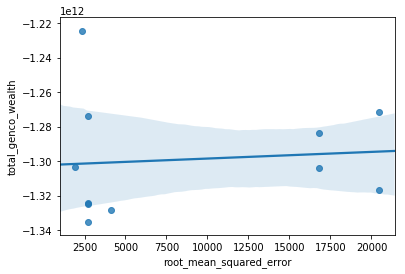

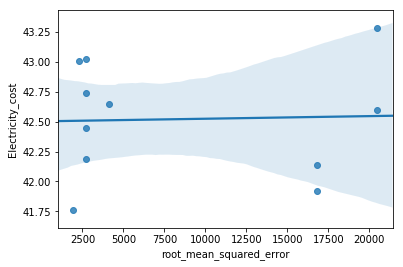

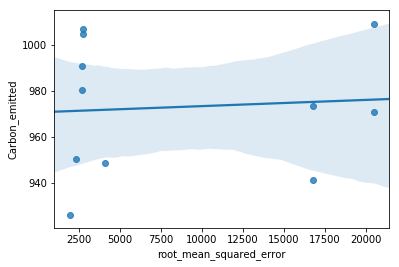

In [13]:
for output_metric in ['total_genco_wealth', 'Electricity_cost', 'Carbon_emitted']:
    get_results_mean('root_mean_squared_error', output_metric)

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


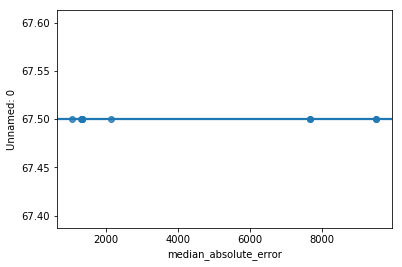

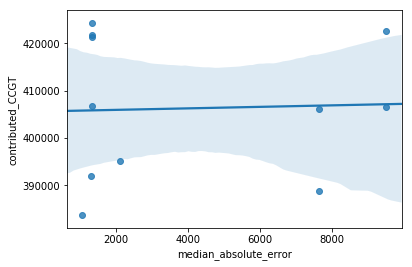

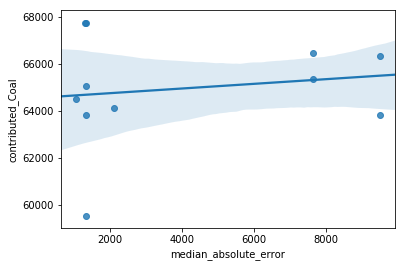

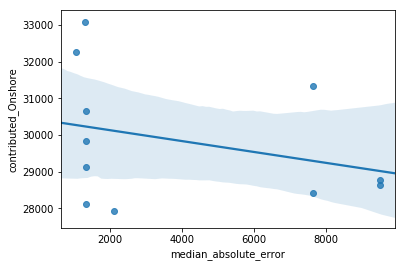

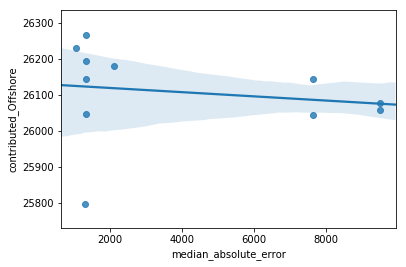

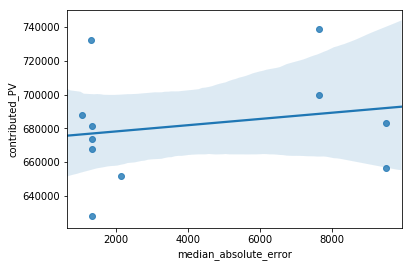

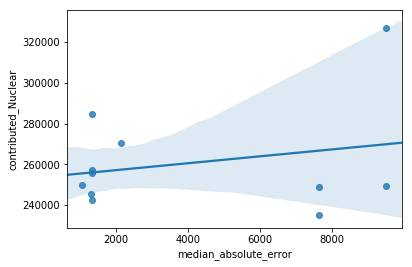

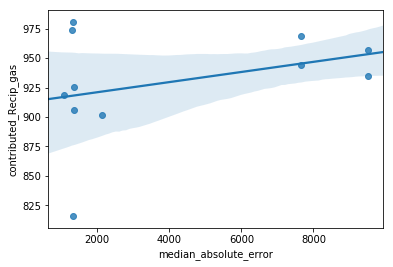

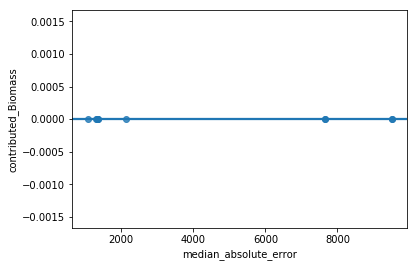

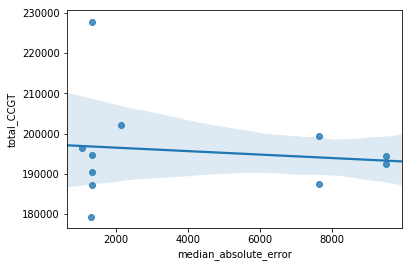

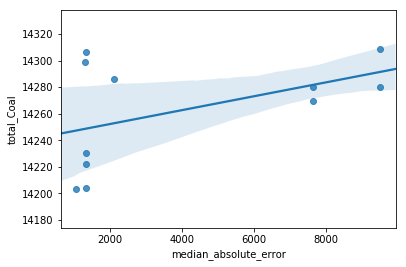

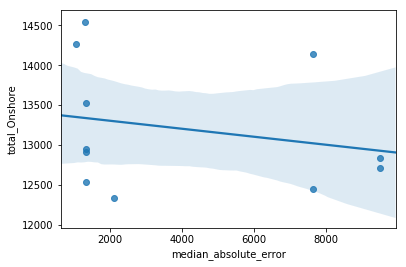

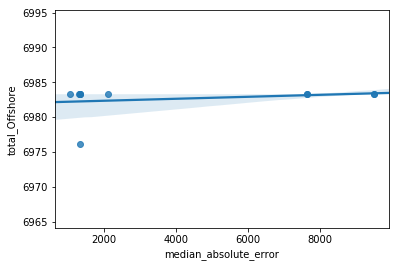

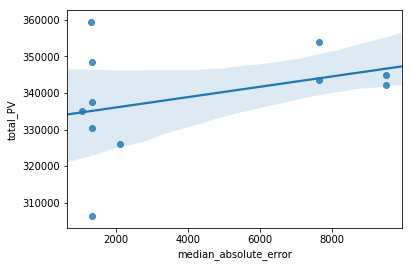

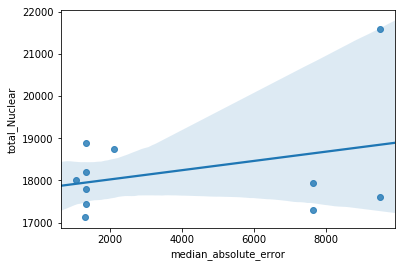

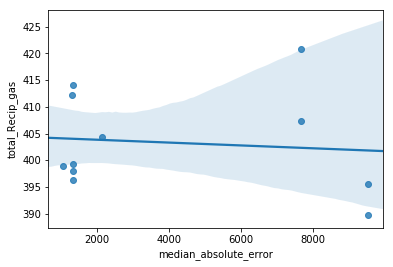

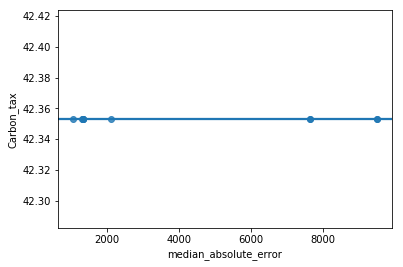

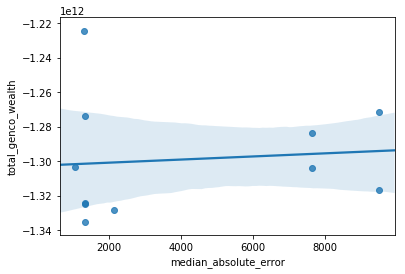

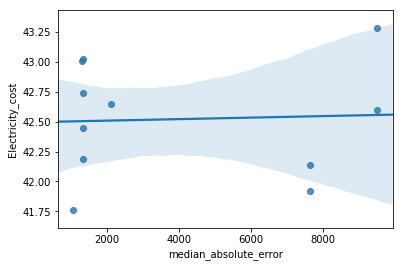

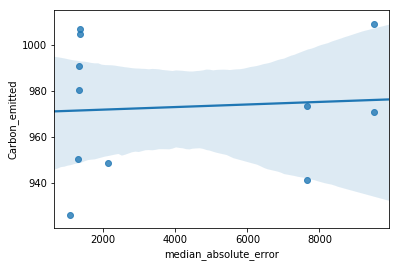

In [14]:
for output_metric in joined_df.columns[:-1]:
    get_results_mean('median_absolute_error', output_metric)

In [15]:
# def get_results_over_time(error_metric, output_metric):

#     correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
#     results_metrics = get_metric(results_dict, error_metric)
#     results_metrics
    
#     correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric], results_metrics.mean()], axis=1).reset_index()
#     correlations = correlations.dropna()
#     correlations = correlations.rename({0: error_metric}, axis=1)
    
#     sns.scatterplot(data = correlations, x= error_metric, y=output_metric)
#     plt.show()
#     plt.close()
    
#     return correlations


# joined_df.columns.str.contains("contributed_")
joined_df.reset_index()

index  Unnamed: 0  \
0       {"C": 0.1, "fit_intercept": false, "max_iter":...           0   
1       {"C": 0.1, "fit_intercept": false, "max_iter":...           1   
2       {"C": 0.1, "fit_intercept": false, "max_iter":...           2   
3       {"C": 0.1, "fit_intercept": false, "max_iter":...           3   
4       {"C": 0.1, "fit_intercept": false, "max_iter":...           4   
...                                                   ...         ...   
368691                                               {} 3         131   
368692                                               {} 3         132   
368693                                               {} 3         133   
368694                                               {} 3         134   
368695                                               {} 3         135   

        contributed_CCGT  contributed_Coal  contributed_Onshore  \
0              306932.70         239410.29         23300.555309   
1              214244.28         216939.53         23464.752699   
2              343491.60         204808.29         21601.843042   
3              345568.80         228578.60         23278.203832   
4              142010.94         142412.51         22191.845222   
...                  ...               ...                  ...   
368691              0.00              0.00        173201.541543   
368692              0.00              0.00        146739.083413   
368693              0.00              0.00        174435.283534   
368694              0.00              0.00        141849.238577   
368695              0.00              0.00        136513.571130   

        contributed_Offshore  contributed_PV  contributed_Nuclear  \
0               29579.745224    3.154551e+03        165604.866874   
1               29595.668288    3.122286e+03        165604.866874   
2               29224.130128    1.658946e+03        165604.866874   
3               29656.706700    3.188160e+03        165604.866874   
4               29595.668288    3.116601e+03        148459.399850   
...                      ...             ...                  ...   
368691          23912.956293    1.569339e+06        477776.203274   
368692          19725.831483    8.151936e+05        214409.740978   
368693          23927.713393    1.547792e+06        437665.687878   
368694          17841.623171    9.561948e+05        234738.839647   
368695          17339.847972    1.124384e+06        213715.371677   

        contributed_Recip_gas  contributed_Biomass  ...  total_Onshore  \
0                    10447.87                    0  ...         8862.6   
1                     1884.71                    0  ...         8862.6   
2                    13135.74                    0  ...         8862.6   
3                    13192.97                    0  ...         8862.6   
4                        0.00                    0  ...         8862.6   
...                       ...                  ...  ...            ...   
368691                   0.00                    0  ...        84136.2   
368692                   0.00                    0  ...        84136.2   
368693                   0.00                    0  ...        84136.2   
368694                   0.00                    0  ...        84136.2   
368695                   0.00                    0  ...        84136.2   

        total_Offshore  total_PV  total_Nuclear  total_Recip_gas  Carbon_tax  \
0               6983.8    3377.8         9361.0            971.5        30.8   
1               6983.8    3377.8         9361.0            971.5        30.8   
2               6983.8    3377.8         9361.0            971.5        30.8   
3               6983.8    3377.8         9361.0            971.5        30.8   
4               6983.8    3377.8         9361.0            971.5        30.8   
...                ...       ...            ...              ...         ...   
368691          6979.5  538225.8        65461.0              0.0        87.9   
368692      

In [16]:
# joined_df_long = joined_df.reset_index().filter(regex="contributed_|Unnamed|index").melt(id_vars=['Unnamed: 0', 'index'])
# joined_df_long = joined_df_long.rename({"Unnamed: 0":"year"}, axis=1)
# joined_df_long
# # g = sns.FacetGrid(data = joined_df_long, col='index')
# # g.map(sns.lineplot, x="year", hue='variable', y='value')
# # joined_df_long
# for name, df in joined_df_long.groupby('index'):
#     print(name)
#     sns.lineplot(data=pd.DataFrame(df), x='year', hue='variable', y='value')
#     plt.show()
#     plt.close()

In [17]:



total_frame
total_frame['year'] = total_frame['Unnamed: 0']/8
total_frame['year'] = total_frame['year'].apply(np.floor)
total_frame['year']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
368691    16.0
368692    16.0
368693    16.0
368694    16.0
368695    16.0
Name: year, Length: 368696, dtype: float64

In [18]:
def plot_multiple_electricity_mixes():
    path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results' # use your path
    all_files = glob.glob(path + "/*.csv")
    results = []
    

    for i, filename in enumerate(all_files):
        result = pd.read_csv(filename, index_col=None, header=0)
        result['params'] = "{"+filename.split("_{")[-1][:-4]
        if i == 1:
            sns.lineplot(data=result[::8], x='Unnamed: 0', y='Carbon_tax')
            plt.ylim([0,500])
            plt.show()
        per_year_dat = get_projection_difference_sum(result)
        results.append(per_year_dat)
    
    results_concat = pd.concat(results)
    for name, one_df in results_concat.groupby('params'):


        one_df = one_df.replace({'variable' : { 'beis_projections' : 'BEIS', 'simulated_perc' : 'ElecSim'}})
        one_df = one_df.replace({'fuel_type' : { 'Natural_gas' : 'Gas', 'coal' : 'Coal', 'nuclear':'Nuclear', "onshore":"Onshore", "offshore":"Offshore","solar":"Solar","biomass":"Biomass","ccgt":"CCGT","recip_gas":"Reciprocating\nGas"}})
        one_df = one_df.rename(columns={'fuel_type':"Fuel Type"})
        # one_df.head()
        sns.set(font_scale=1)
        sns.set_style("whitegrid")

    #     sns.lineplot(data=one_df, x='year',y='')
        print(one_df['params'].iloc[0])
        g=sns.lineplot(data=one_df, x='year', hue='Fuel Type',  y='simulated_perc')
        g.set(xlabel='Year', ylabel='Electricity Mix (%)')
        # lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        lgd = plt.legend(bbox_to_anchor=(1,-0.2), borderaxespad=0., ncol=4)
        plt.ylim(0,0.65)

        plt.show()
        plt.close()
    
    return results_concat
#     plt.savefig("/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/figures/results/best_electricity_mixes/{}_mix.pdf".format(folder), dpi=1000, bbox_inches='tight')



def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run'
    params = results_df['params'].iloc[0]
    
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    joined['params'] = params
    return joined

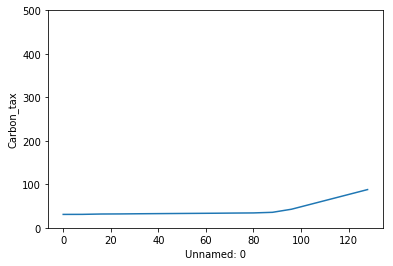

{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


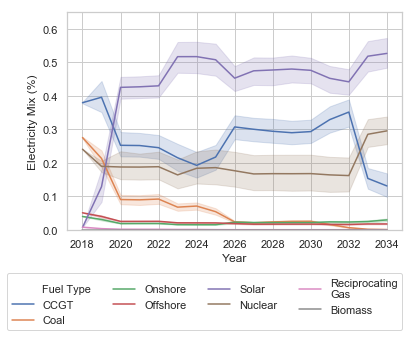

{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 2


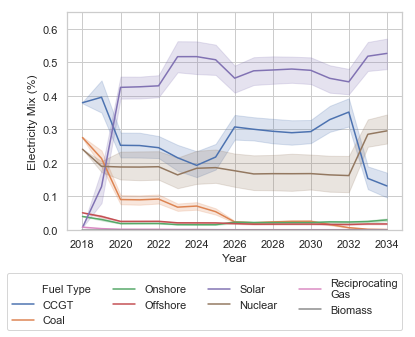

{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 3


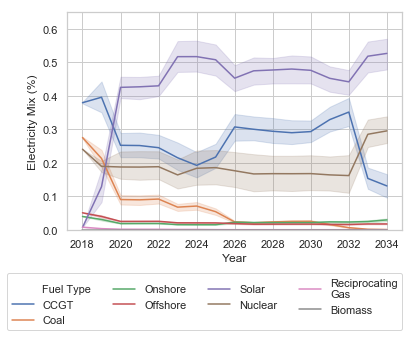

{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


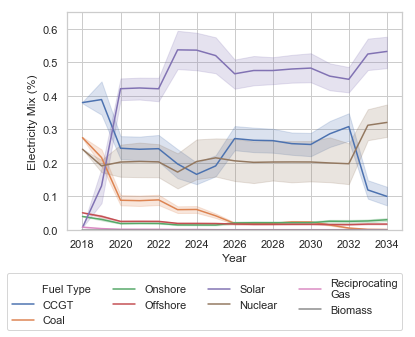

{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001} 2


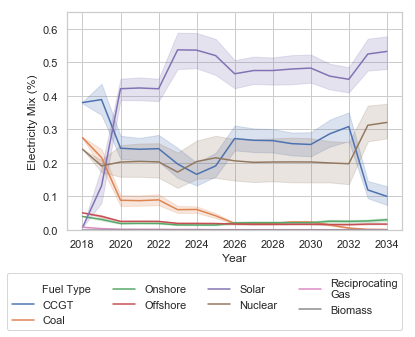

{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001} 3


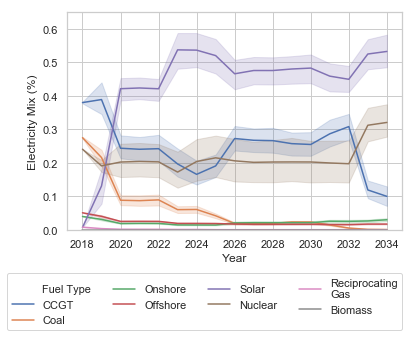

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


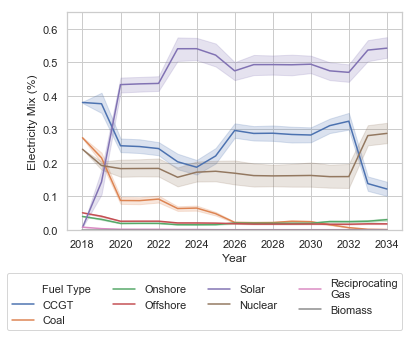

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001} 2


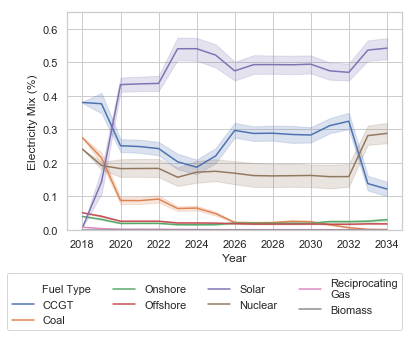

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001} 3


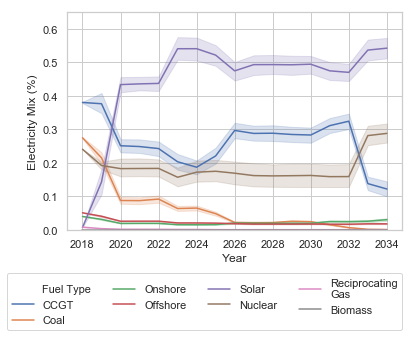

{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}


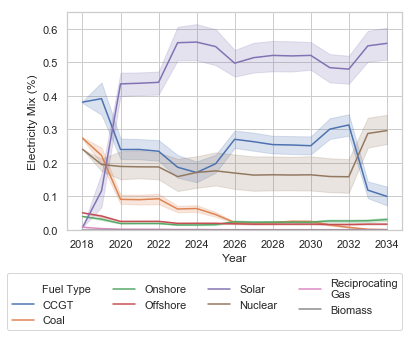

{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001} 2


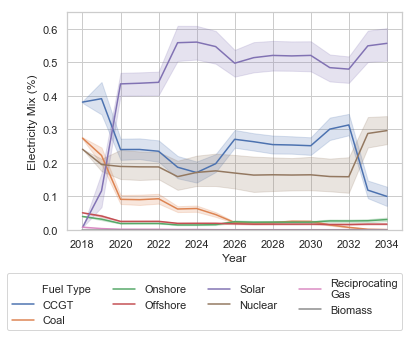

{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001} 3


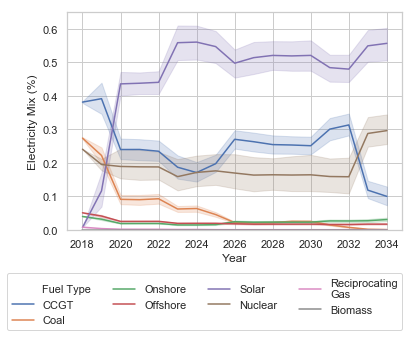

{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


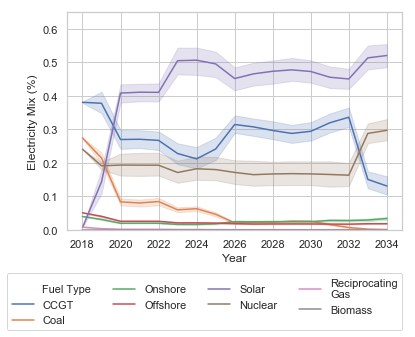

{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 2


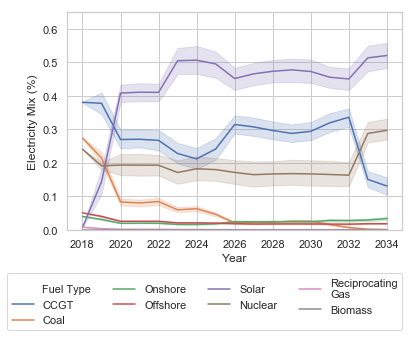

{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001} 3


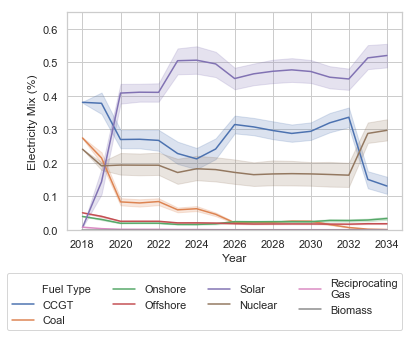

{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


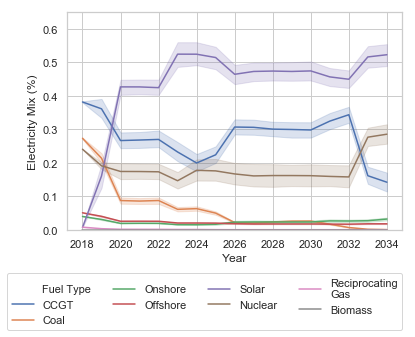

{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001} 2


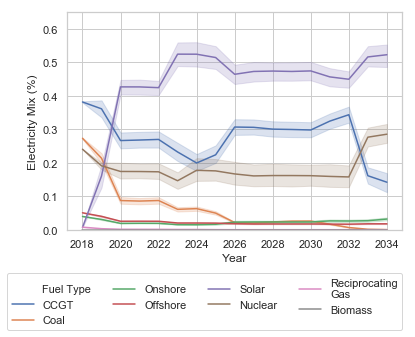

{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001} 3


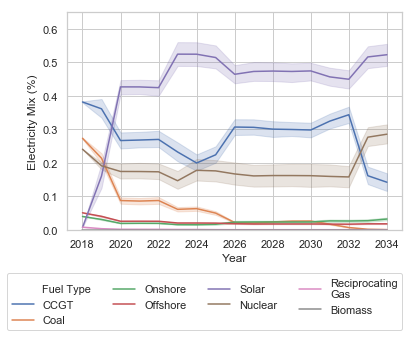

{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


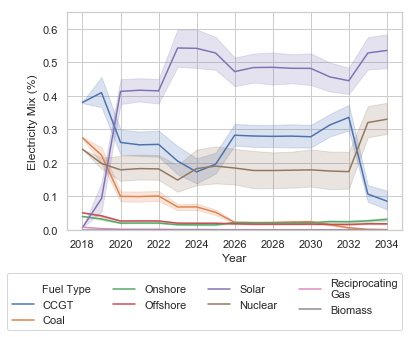

{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001} 2


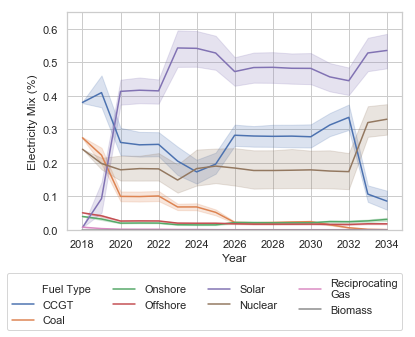

{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001} 3


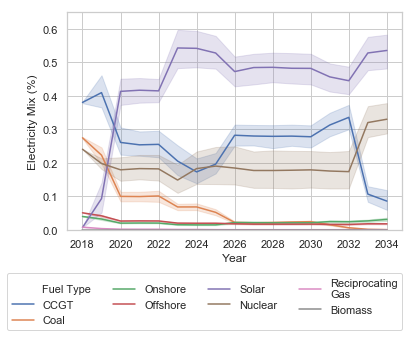

{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}


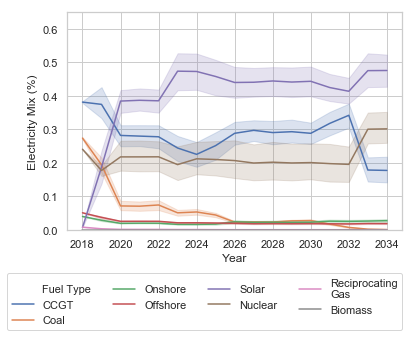

{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001} 2


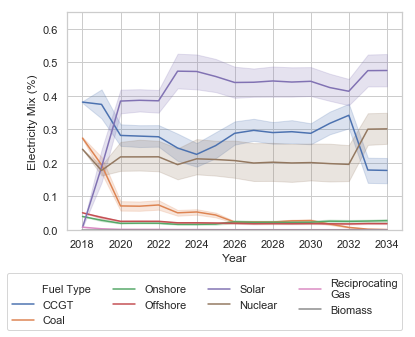

{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001} 3


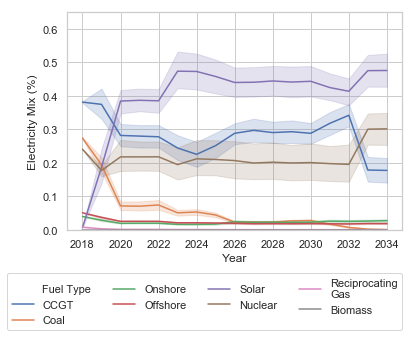

{"hidden_layer_sizes": 10, "learning_rate": "adaptive", "solver": "adam"}


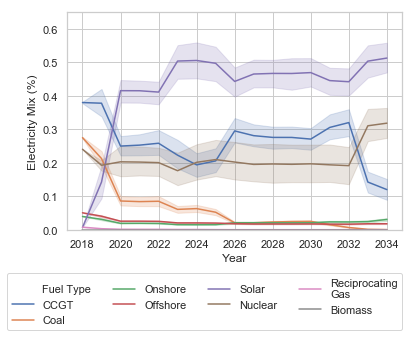

{"hidden_layer_sizes": 10, "learning_rate": "adaptive", "solver": "adam"} 2


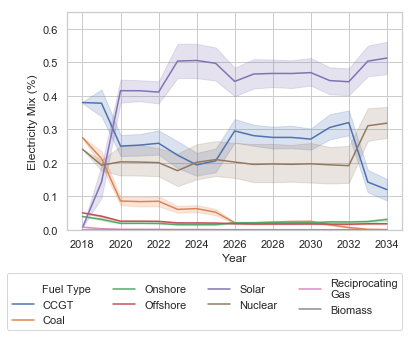

{"hidden_layer_sizes": 10, "learning_rate": "adaptive", "solver": "adam"} 3


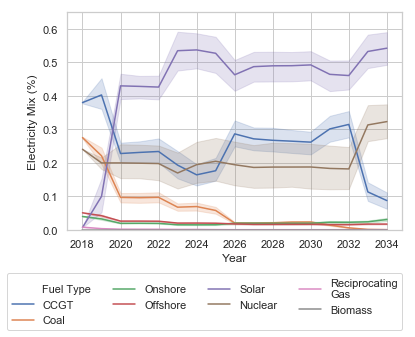

{"power": 0.1}


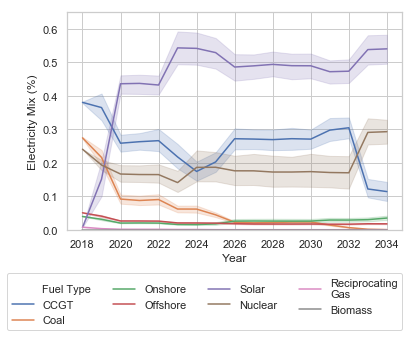

{"power": 0.1} 2


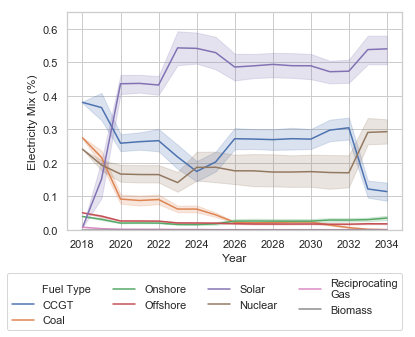

{"power": 0.1} 3


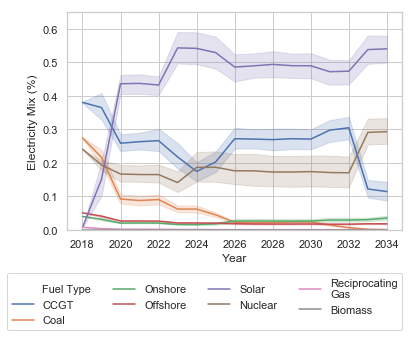

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-32-14-capacity_1-demand_distribution_None


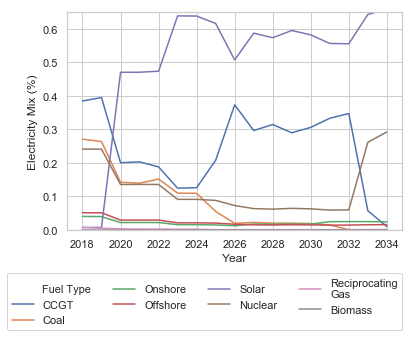

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-32-14-capacity_1-demand_distribution_None 2


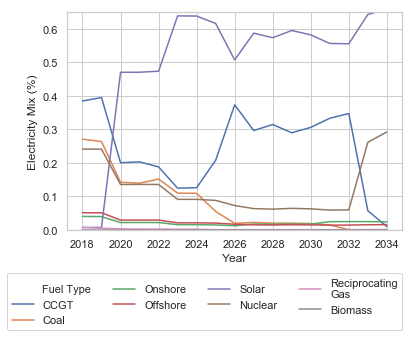

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-32-25-capacity_1-demand_distribution_None


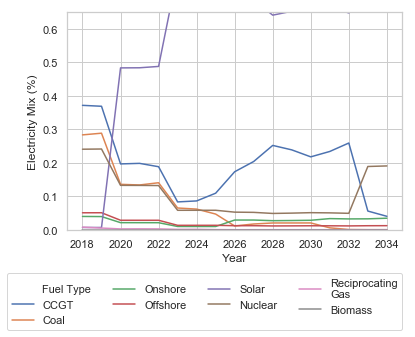

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-32-25-capacity_1-demand_distribution_None 2


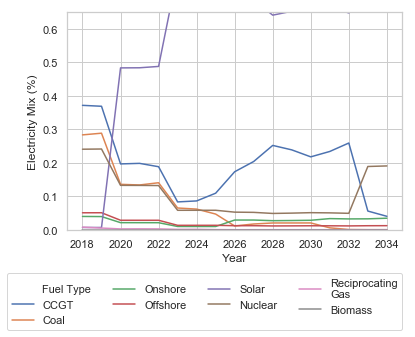

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-32-55-capacity_1-demand_distribution_None


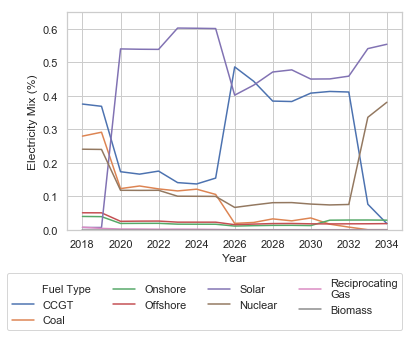

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-32-55-capacity_1-demand_distribution_None 2


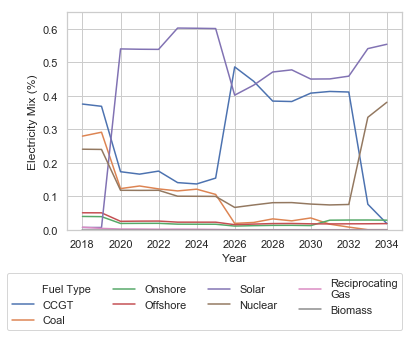

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-29-capacity_1-demand_distribution_None


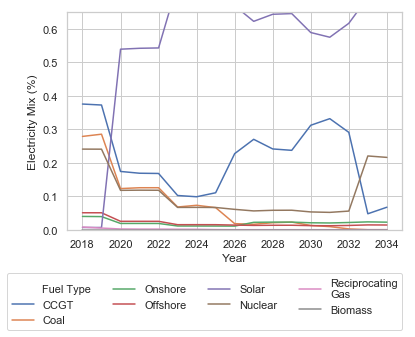

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-29-capacity_1-demand_distribution_None 2


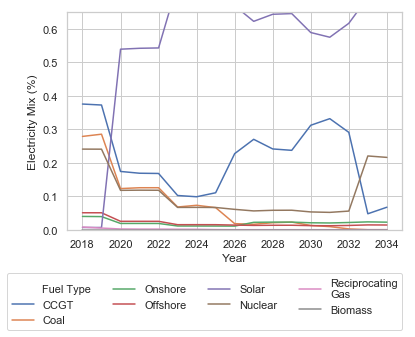

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-30-capacity_1-demand_distribution_None


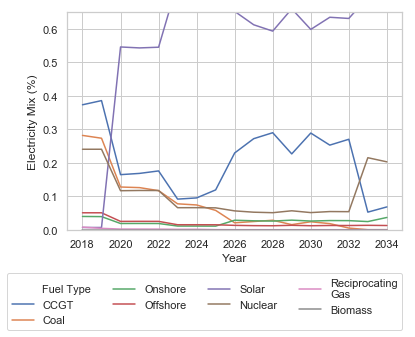

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-30-capacity_1-demand_distribution_None 2


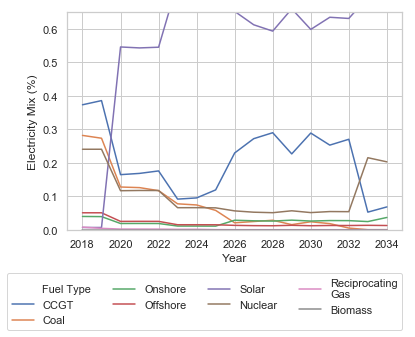

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-38-capacity_1-demand_distribution_None


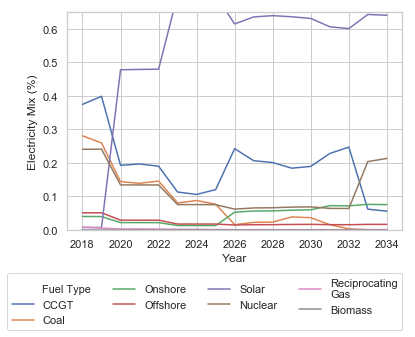

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-38-capacity_1-demand_distribution_None 2


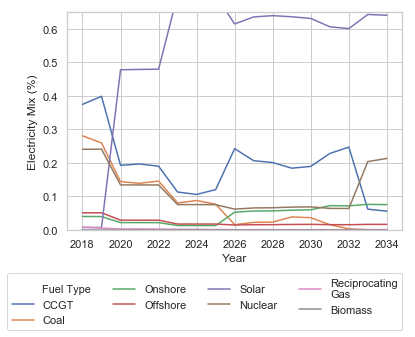

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-47-capacity_1-demand_distribution_None


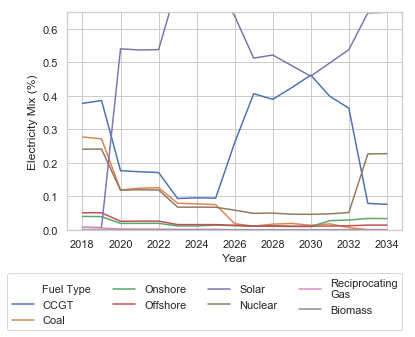

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-47-capacity_1-demand_distribution_None 2


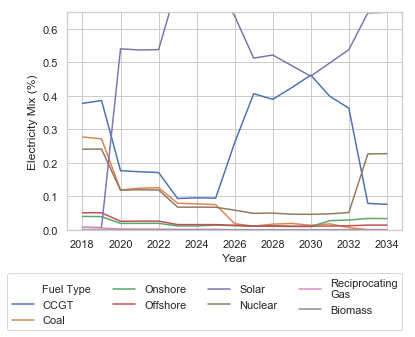

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-49-capacity_1-demand_distribution_None


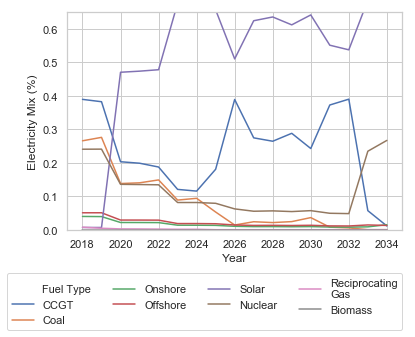

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-49-capacity_1-demand_distribution_None 2


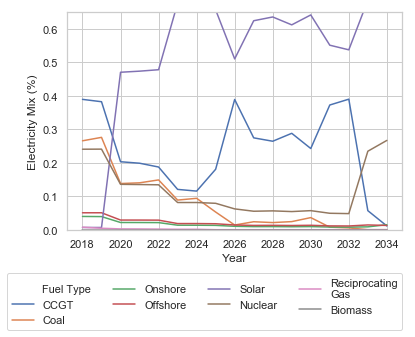

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-56-capacity_1-demand_distribution_None


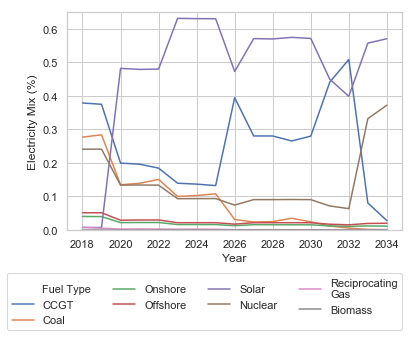

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-33-56-capacity_1-demand_distribution_None 2


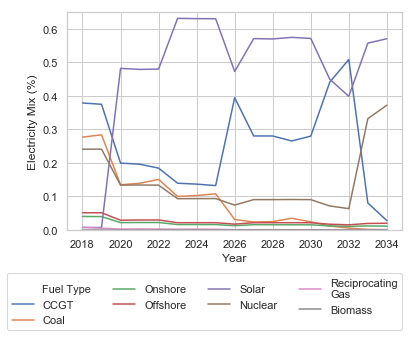

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-06-capacity_1-demand_distribution_None


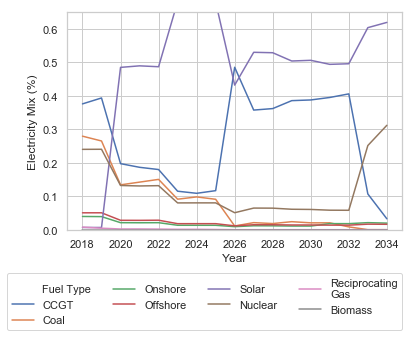

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-06-capacity_1-demand_distribution_None 2


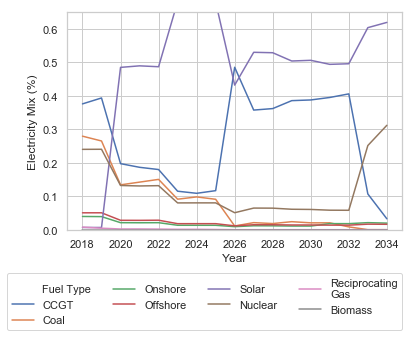

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-13-capacity_1-demand_distribution_None


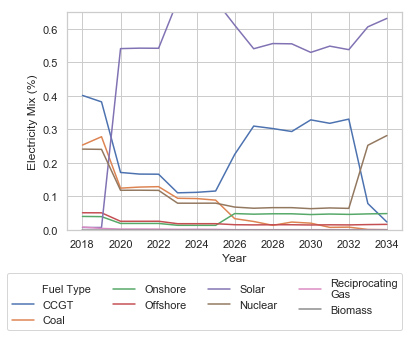

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-13-capacity_1-demand_distribution_None 2


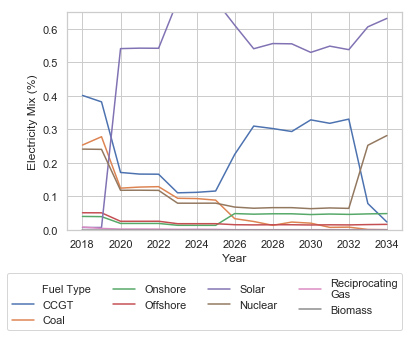

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-19-capacity_1-demand_distribution_None


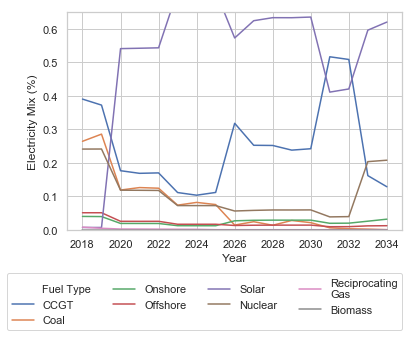

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-19-capacity_1-demand_distribution_None 2


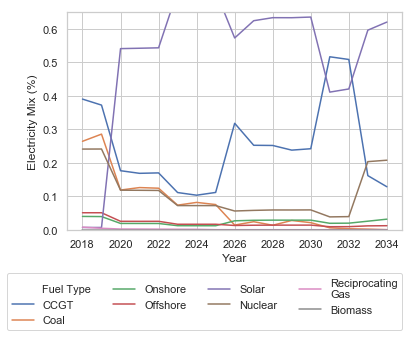

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-22-capacity_1-demand_distribution_None


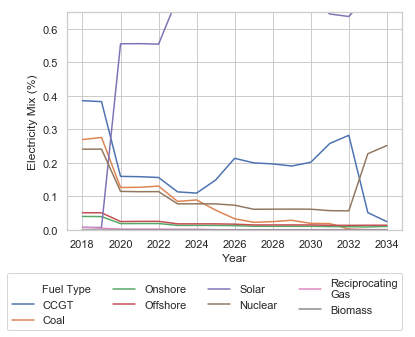

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-22-capacity_1-demand_distribution_None 2


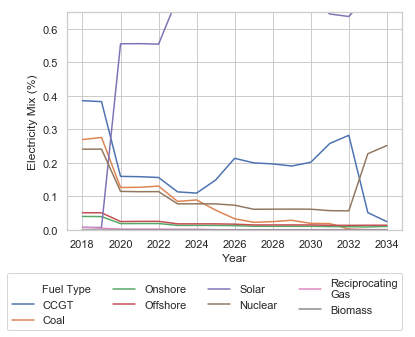

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-23-capacity_1-demand_distribution_None


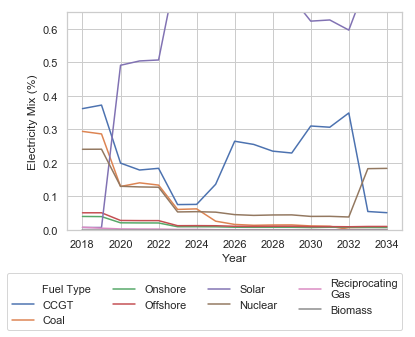

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-23-capacity_1-demand_distribution_None 2


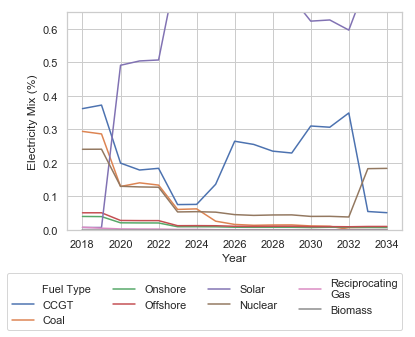

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-36-capacity_1-demand_distribution_None


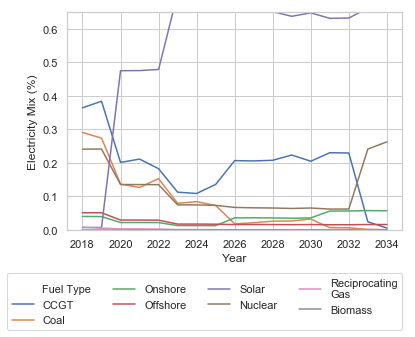

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-36-capacity_1-demand_distribution_None 2


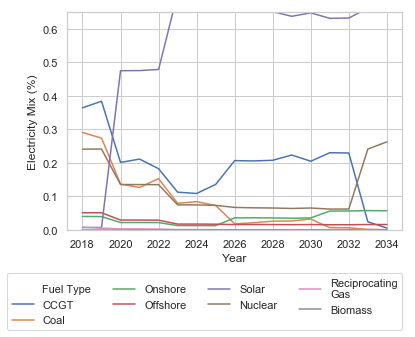

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-47-capacity_1-demand_distribution_None


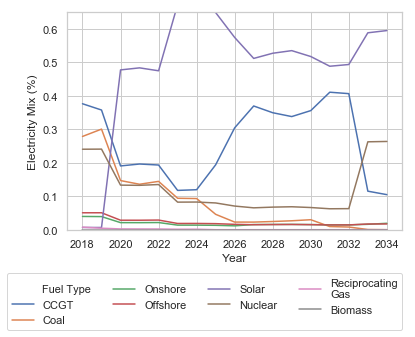

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-47-capacity_1-demand_distribution_None 2


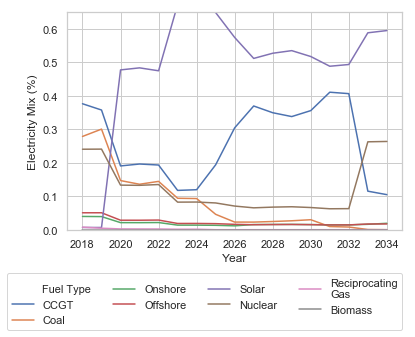

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-54-capacity_1-demand_distribution_None


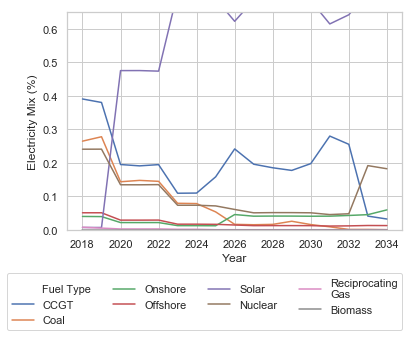

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-54-capacity_1-demand_distribution_None 2


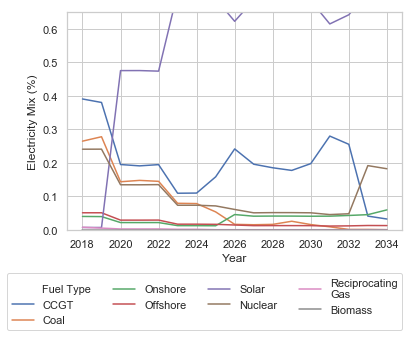

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-59-capacity_1-demand_distribution_None


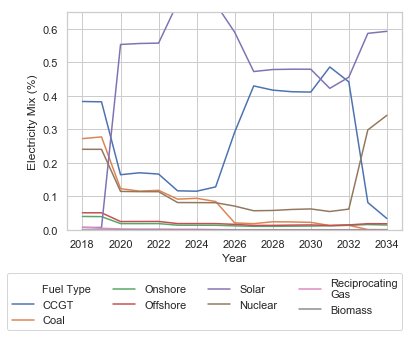

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-34-59-capacity_1-demand_distribution_None 2


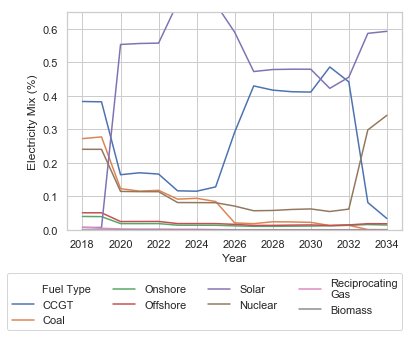

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-03-capacity_1-demand_distribution_None


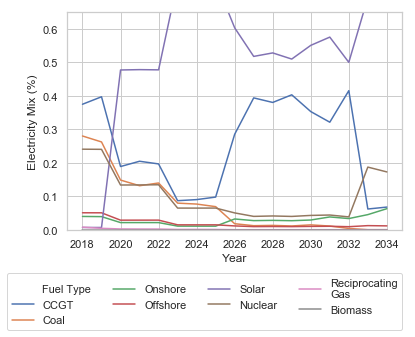

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-03-capacity_1-demand_distribution_None 2


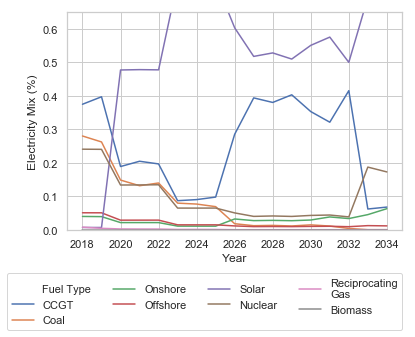

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-04-capacity_1-demand_distribution_None


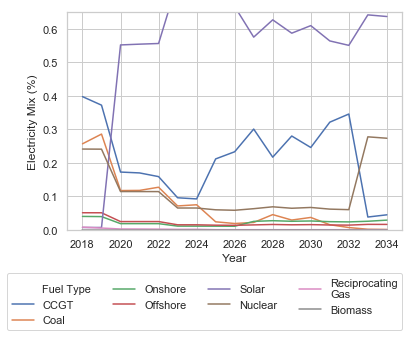

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-04-capacity_1-demand_distribution_None 2


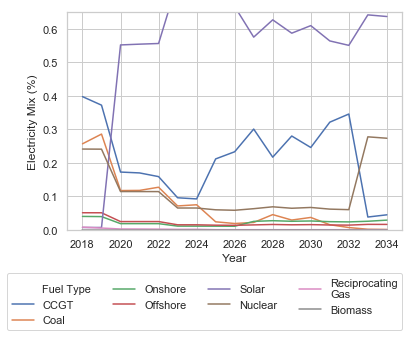

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-11-capacity_1-demand_distribution_None


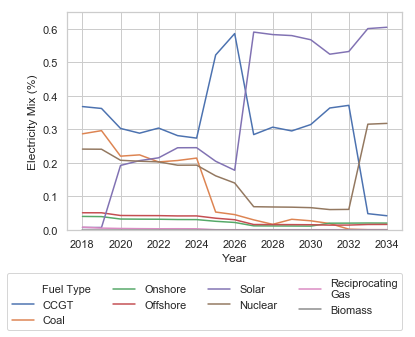

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-11-capacity_1-demand_distribution_None 2


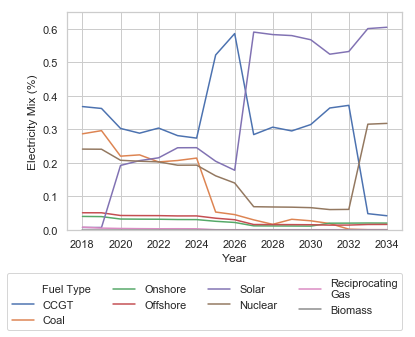

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-14-capacity_1-demand_distribution_None


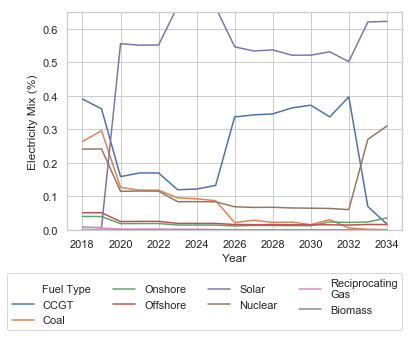

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-14-capacity_1-demand_distribution_None 2


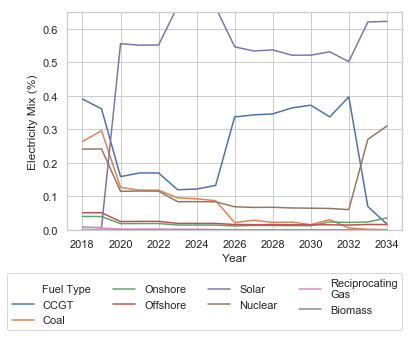

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-20-capacity_1-demand_distribution_None


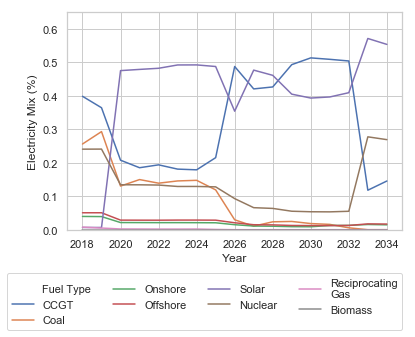

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-20-capacity_1-demand_distribution_None 2


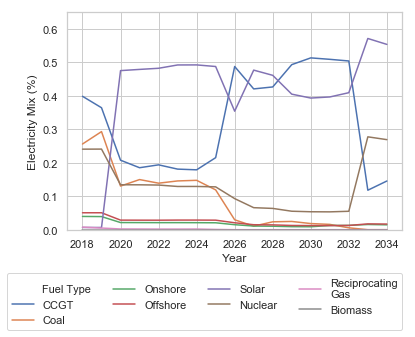

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-23-capacity_1-demand_distribution_None


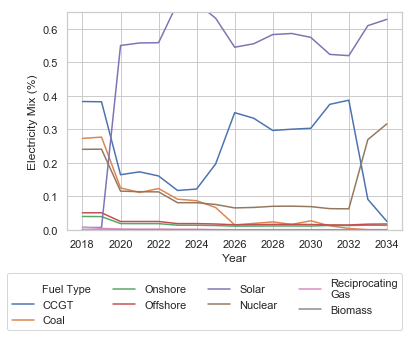

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-23-capacity_1-demand_distribution_None 2


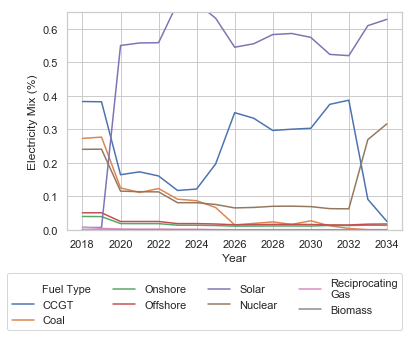

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-24-capacity_1-demand_distribution_None


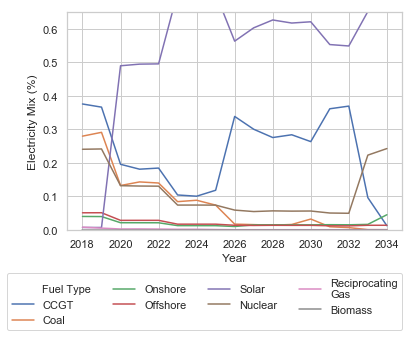

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-24-capacity_1-demand_distribution_None 2


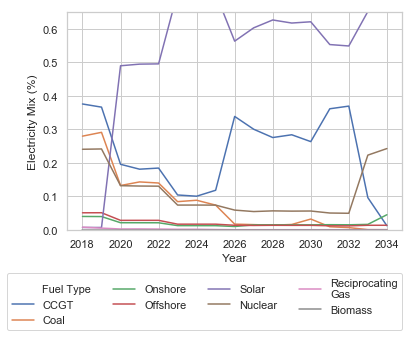

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-25-capacity_1-demand_distribution_None


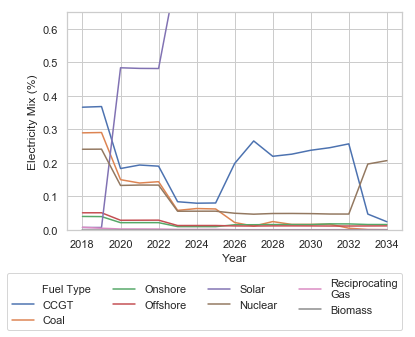

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-25-capacity_1-demand_distribution_None 2


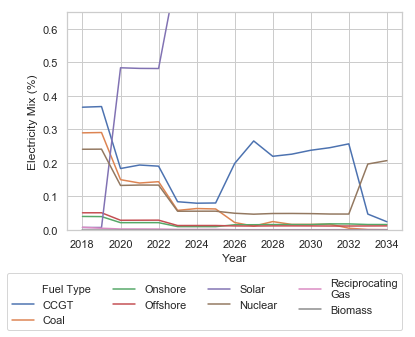

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-28-capacity_1-demand_distribution_None


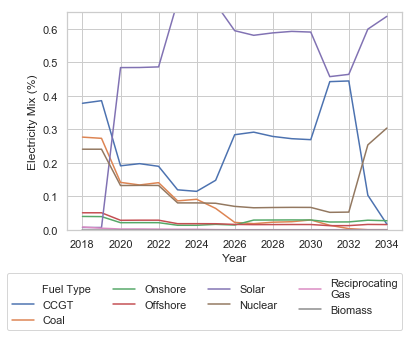

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-28-capacity_1-demand_distribution_None 2


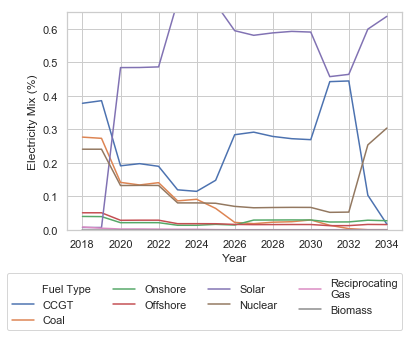

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-45-capacity_1-demand_distribution_None


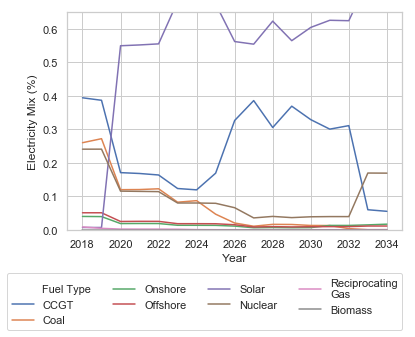

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-45-capacity_1-demand_distribution_None 2


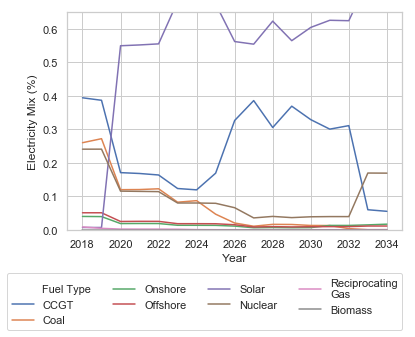

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-54-capacity_1-demand_distribution_None


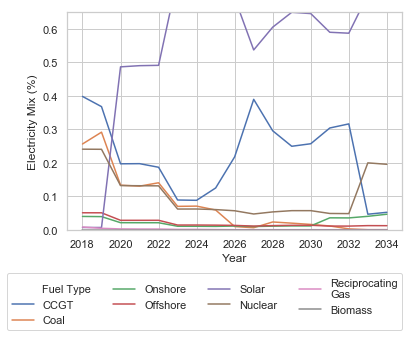

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-54-capacity_1-demand_distribution_None 2


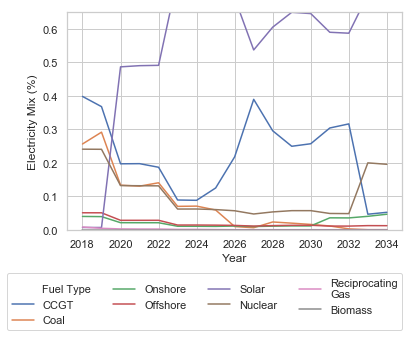

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-59-capacity_1-demand_distribution_None


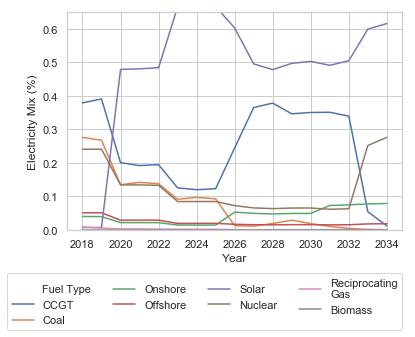

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-35-59-capacity_1-demand_distribution_None 2


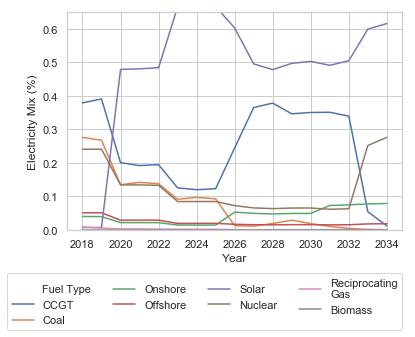

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-04-capacity_1-demand_distribution_None


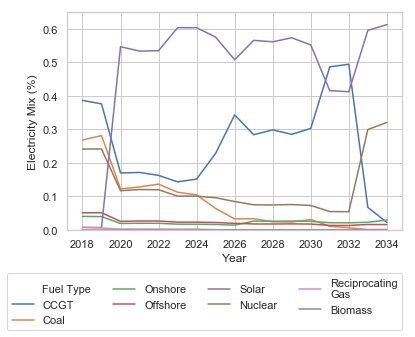

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-04-capacity_1-demand_distribution_None 2


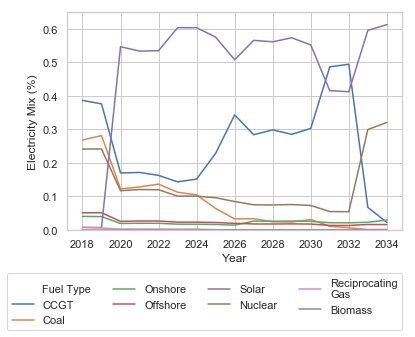

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-06-capacity_1-demand_distribution_None


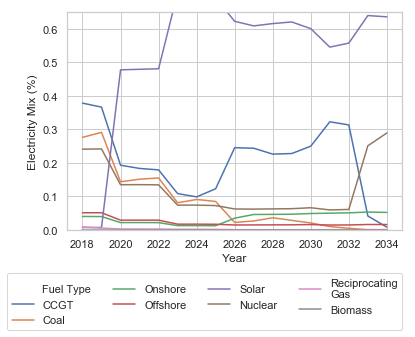

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-06-capacity_1-demand_distribution_None 2


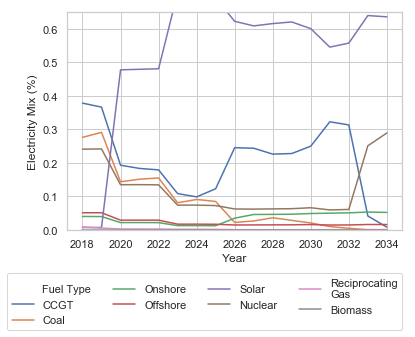

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-19-capacity_1-demand_distribution_None


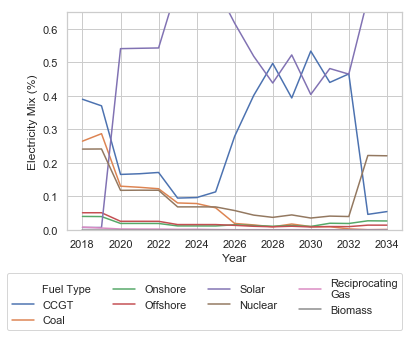

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-19-capacity_1-demand_distribution_None 2


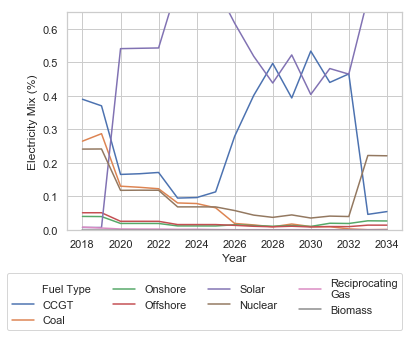

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-29-capacity_1-demand_distribution_None


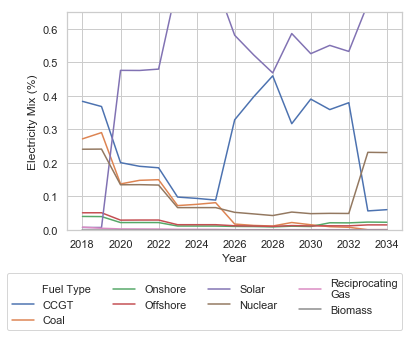

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-29-capacity_1-demand_distribution_None 2


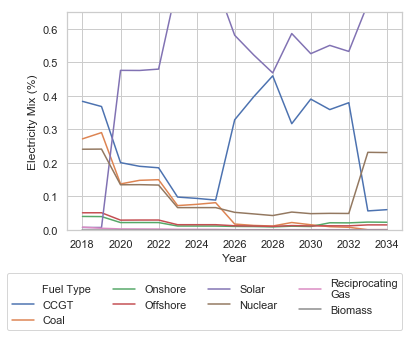

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-38-capacity_1-demand_distribution_None


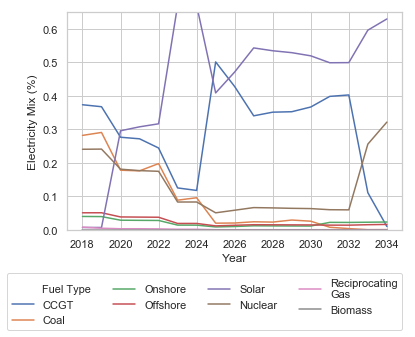

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-38-capacity_1-demand_distribution_None 2


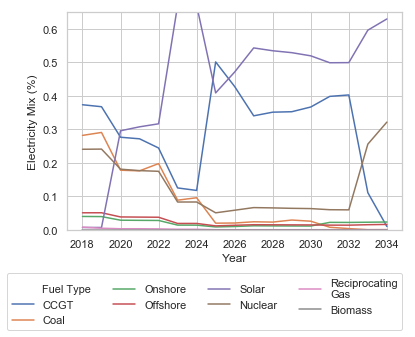

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-55-capacity_1-demand_distribution_None


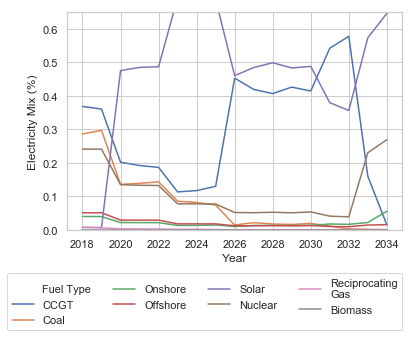

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-36-55-capacity_1-demand_distribution_None 2


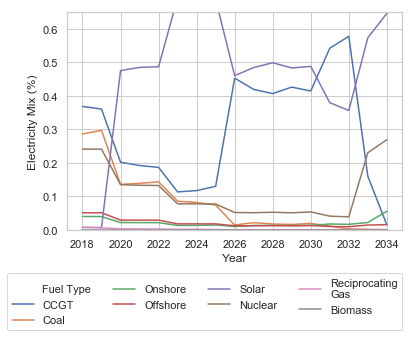

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-37-03-capacity_1-demand_distribution_None


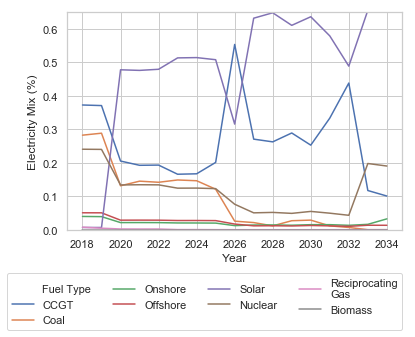

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-37-03-capacity_1-demand_distribution_None 2


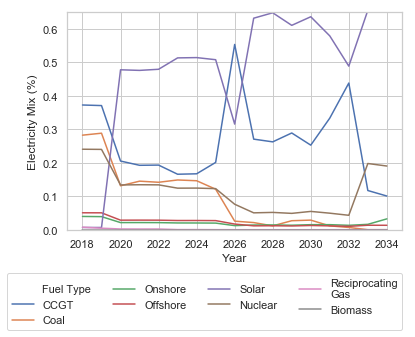

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-38-32-capacity_1-demand_distribution_None


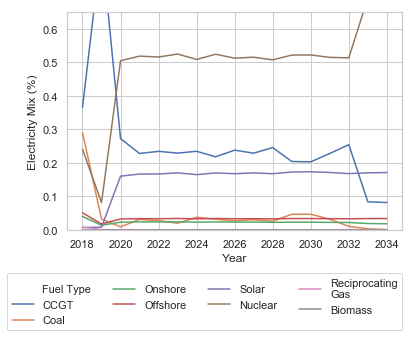

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-38-32-capacity_1-demand_distribution_None 2


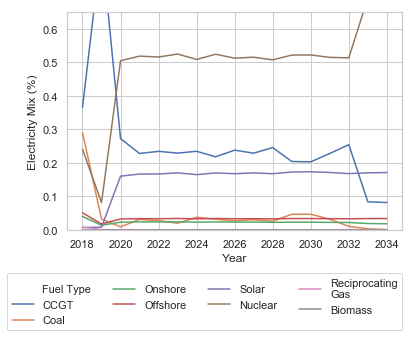

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-41-04-capacity_1-demand_distribution_None


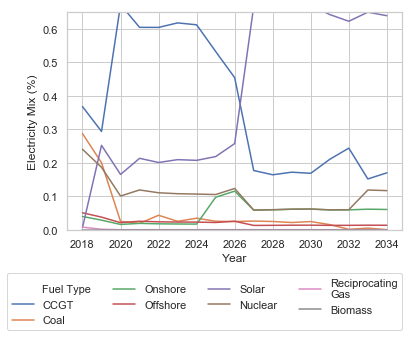

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-41-04-capacity_1-demand_distribution_None 2


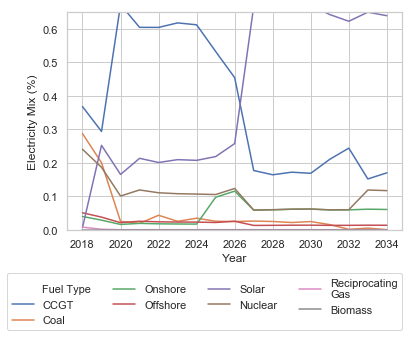

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-41-37-capacity_1-demand_distribution_None


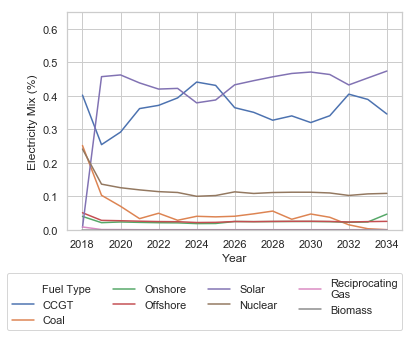

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-41-37-capacity_1-demand_distribution_None 2


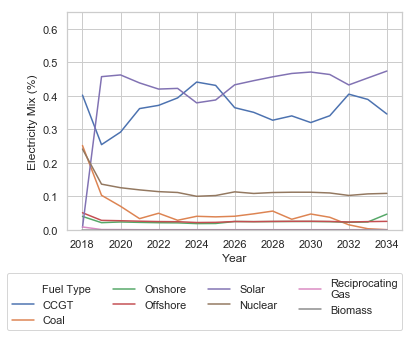

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-43-52-capacity_1-demand_distribution_None


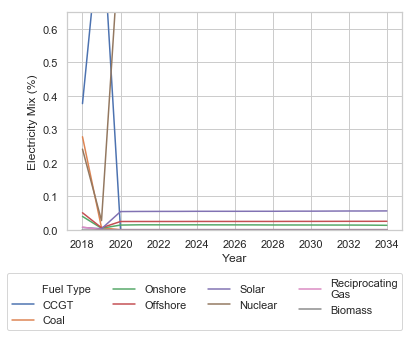

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-43-52-capacity_1-demand_distribution_None 2


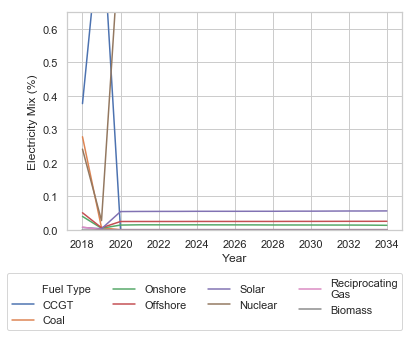

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-01-capacity_1-demand_distribution_None


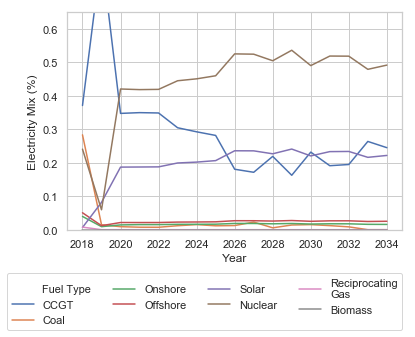

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-01-capacity_1-demand_distribution_None 2


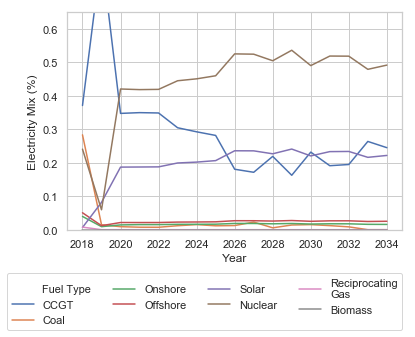

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-24-capacity_1-demand_distribution_None


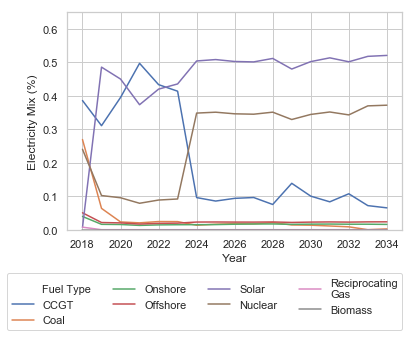

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-24-capacity_1-demand_distribution_None 2


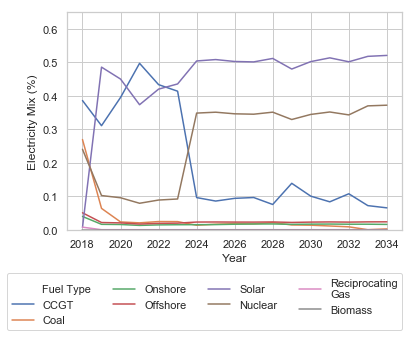

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-35-capacity_1-demand_distribution_None


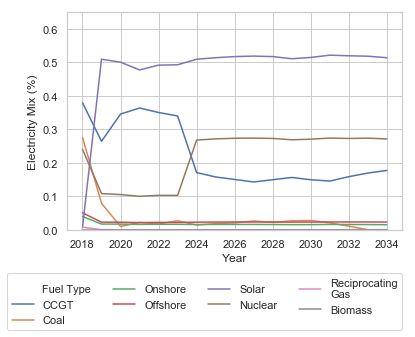

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-35-capacity_1-demand_distribution_None 2


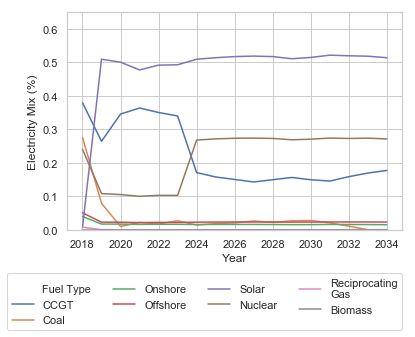

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-45-capacity_1-demand_distribution_None


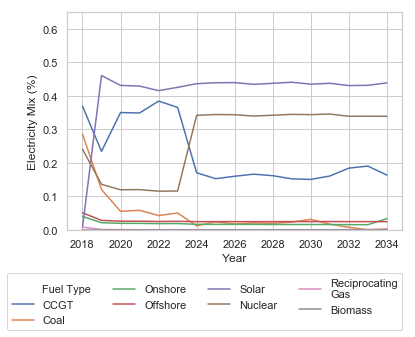

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-46-45-capacity_1-demand_distribution_None 2


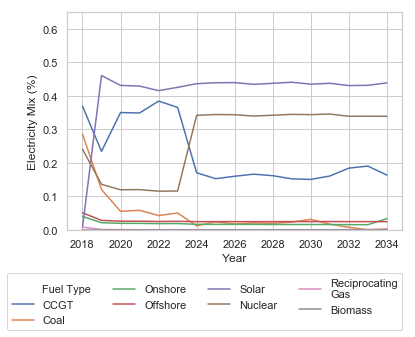

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-47-27-capacity_1-demand_distribution_None


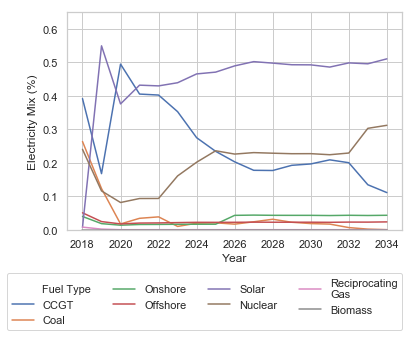

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-47-27-capacity_1-demand_distribution_None 2


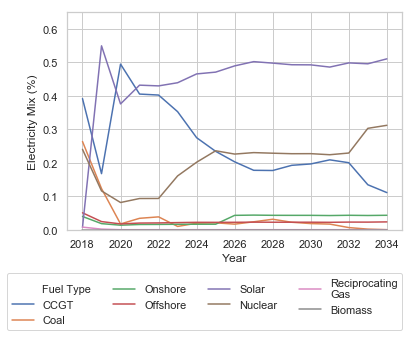

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-47-30-capacity_1-demand_distribution_None


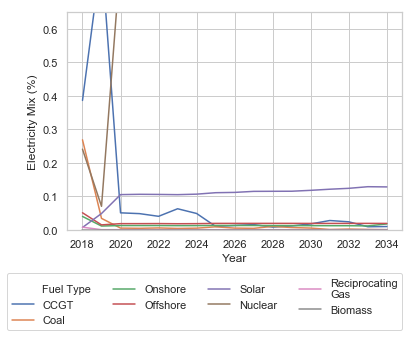

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-47-30-capacity_1-demand_distribution_None 2


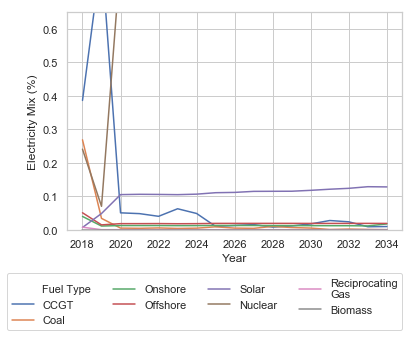

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-47-32-capacity_1-demand_distribution_None


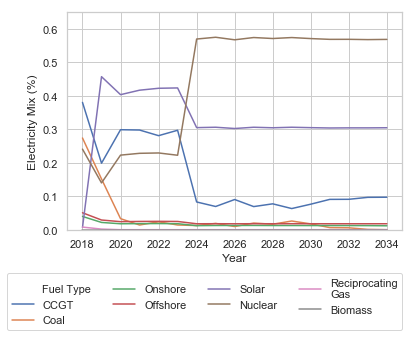

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-47-32-capacity_1-demand_distribution_None 2


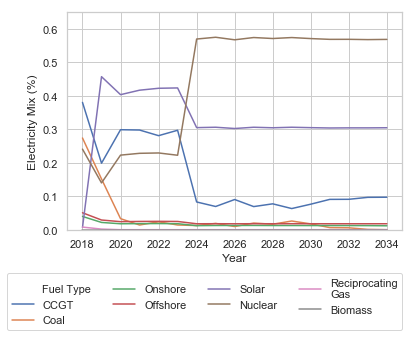

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-48-04-capacity_1-demand_distribution_None


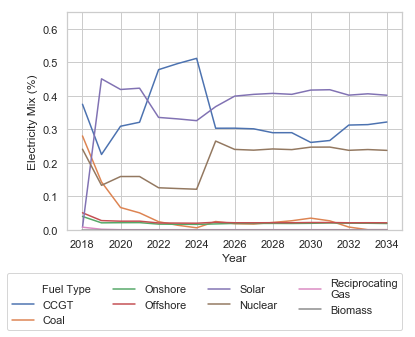

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-48-04-capacity_1-demand_distribution_None 2


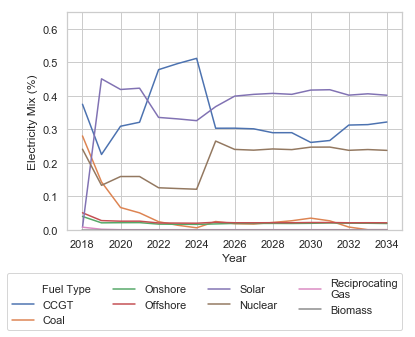

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-52-16-capacity_1-demand_distribution_None


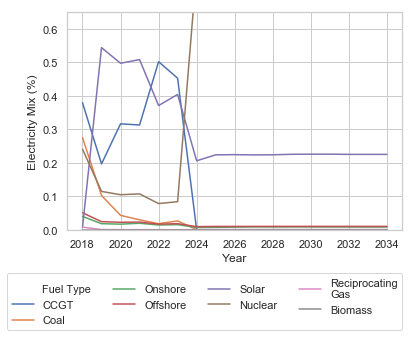

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-52-16-capacity_1-demand_distribution_None 2


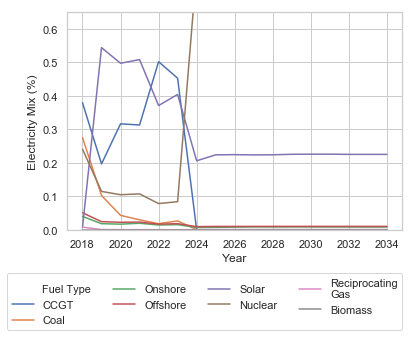

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-54-18-capacity_1-demand_distribution_None


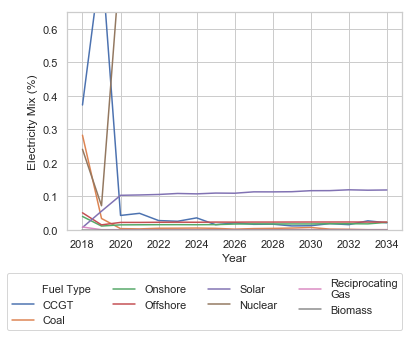

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-54-18-capacity_1-demand_distribution_None 2


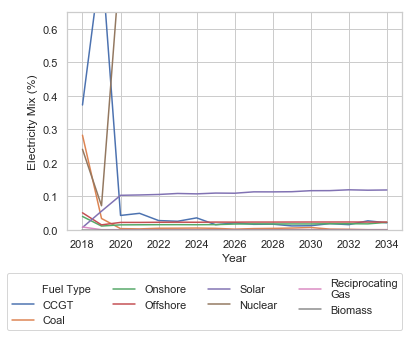

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-54-47-capacity_1-demand_distribution_None


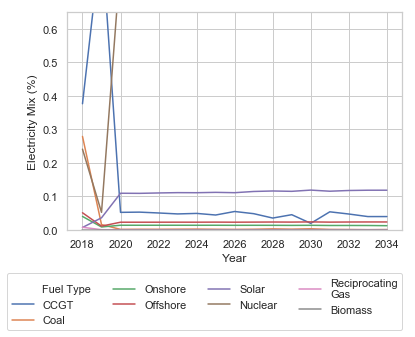

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-54-47-capacity_1-demand_distribution_None 2


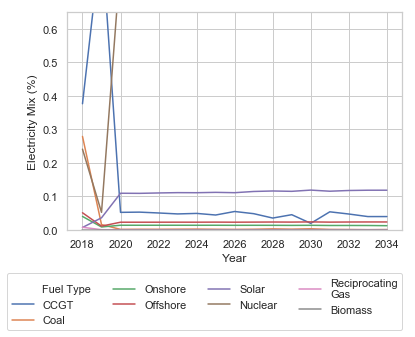

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-55-19-capacity_1-demand_distribution_None


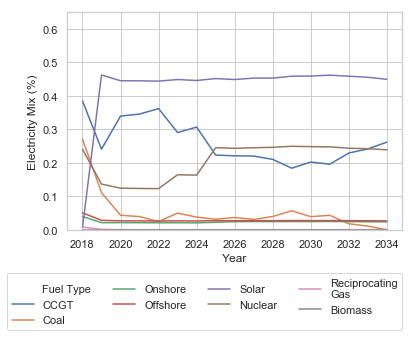

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-55-19-capacity_1-demand_distribution_None 2


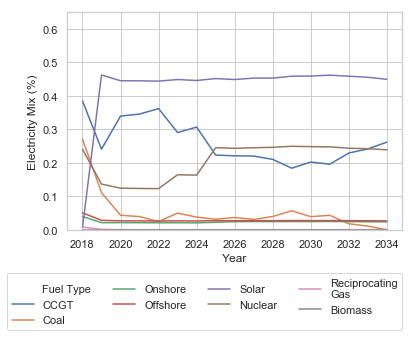

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-55-40-capacity_1-demand_distribution_None


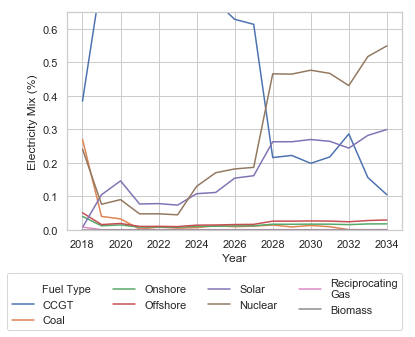

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-55-40-capacity_1-demand_distribution_None 2


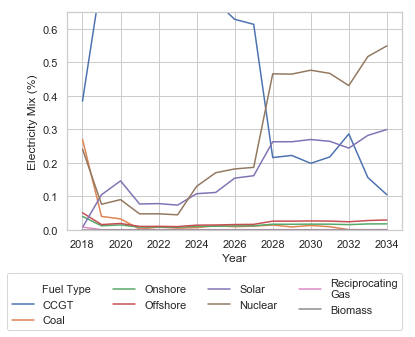

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-55-58-capacity_1-demand_distribution_None


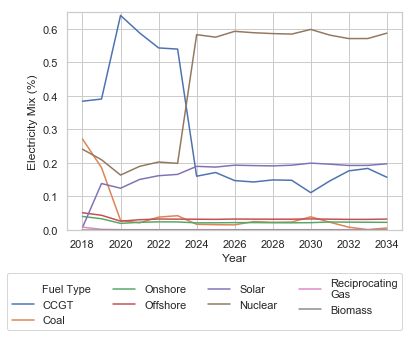

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-55-58-capacity_1-demand_distribution_None 2


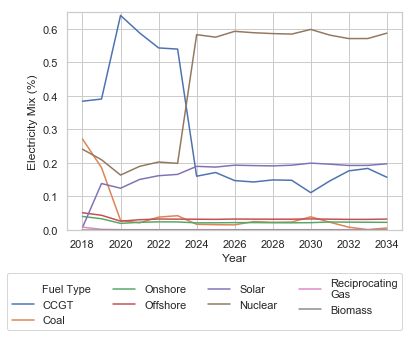

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-57-18-capacity_1-demand_distribution_None


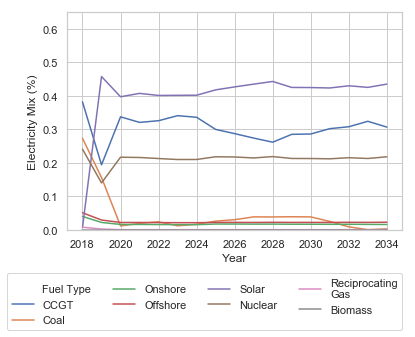

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-57-18-capacity_1-demand_distribution_None 2


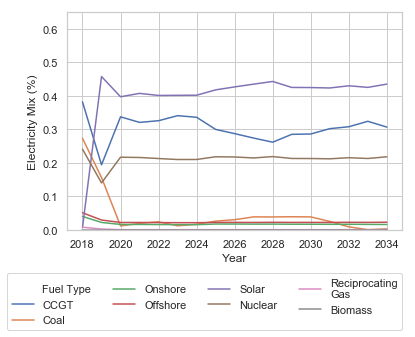

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-57-44-capacity_1-demand_distribution_None


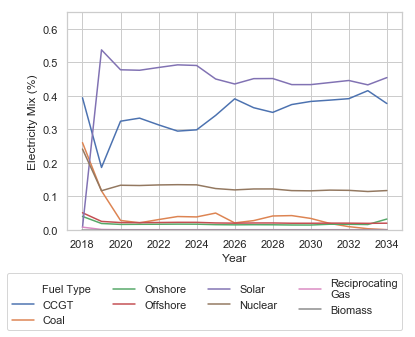

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-57-46-capacity_1-demand_distribution_None


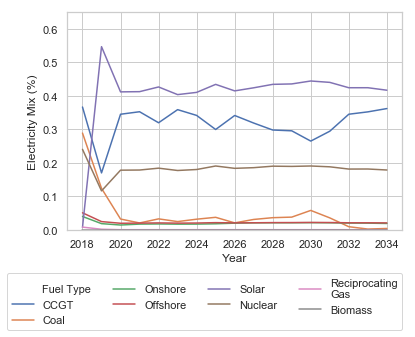

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-58-03-capacity_1-demand_distribution_None


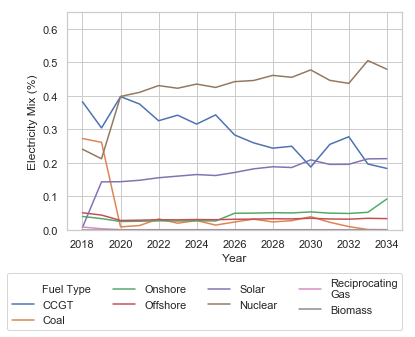

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_14-58-41-capacity_1-demand_distribution_None


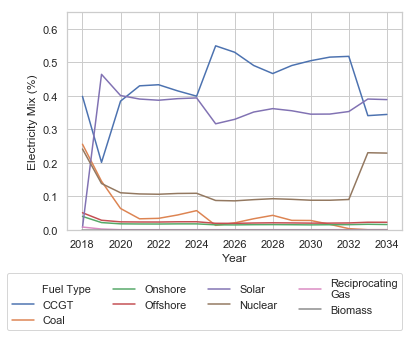

{/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results/demand_none-carbon_none-datetime_2020-05-04_15-00-58-capacity_1-demand_distribution_None


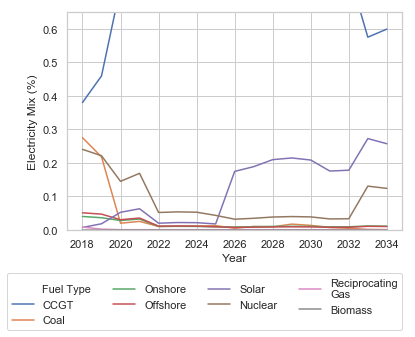

{}


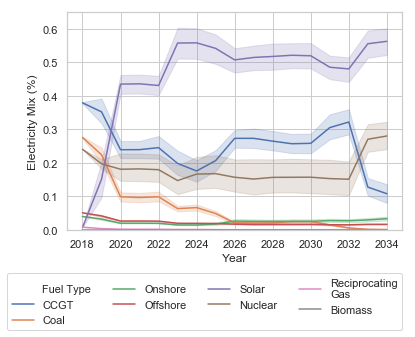

{} 2


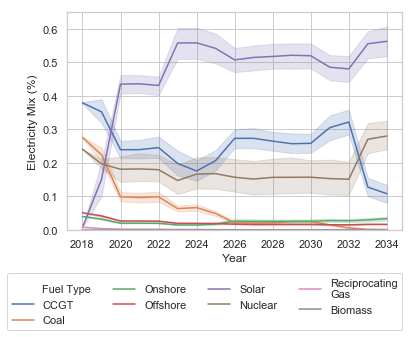

{} 3


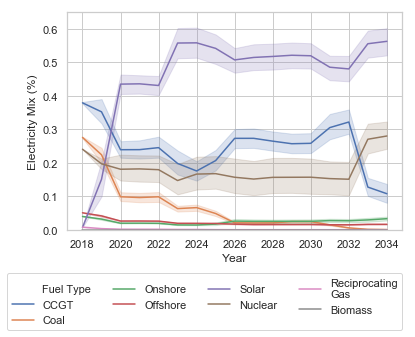

In [19]:
# averaged_df = total_frame.reset_index().groupby('params').apply(get_average_per_year_cleaned)
# averaged_df
results_concat = plot_multiple_electricity_mixes()

In [20]:
results_concat

year fuel_type        actual  simulated_perc  \
0    2018      ccgt  10226.628979        0.384374   
1    2019      ccgt   7792.439479        0.181771   
2    2020      ccgt  13119.617041        0.277752   
3    2021      ccgt  12028.243836        0.266169   
4    2022      ccgt  11800.844849        0.260607   
..    ...       ...           ...             ...   
131  2030   biomass      0.000000        0.000000   
132  2031   biomass      0.000000        0.000000   
133  2032   biomass      0.000000        0.000000   
134  2033   biomass      0.000000        0.000000   
135  2034   biomass      0.000000        0.000000   

                                                params  
0    {"C": 2, "fit_intercept": false, "max_iter": 1...  
1    {"C": 2, "fit_intercept": false, "max_iter": 1...  
2    {"C": 2, "fit_intercept": false, "max_iter": 1...  
3    {"C": 2, "fit_intercept": false, "max_iter": 1...  
4    {"C": 2, "fit_intercept": false, "max_iter": 1...  
..                                                 ...  
131  {"C": 2, "fit_intercept": false, "max_iter": 1...  
132  {"C": 2, "fit_intercept": false, "max_iter": 1...  
133  {"C": 2, "fit_intercept": false, "max_iter": 1...  
134  {"C": 2, "fit_intercept": false, "max_iter": 1...  
135  {"C": 2, "fit_intercept": false, "max_iter": 1...  

[368696 rows x 5 columns]

In [21]:
'{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}'
'{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'

both_results = results_concat[results_concat.params.str.contains('{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}')].append(results_concat[results_concat.params.str.contains('{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}')])
both_results

year fuel_type       actual  simulated_perc  \
0    2018      ccgt  9959.929116        0.375159   
1    2019      ccgt  9681.037110        0.363738   
2    2020      ccgt  7951.159938        0.195243   
3    2021      ccgt  7647.924137        0.189350   
4    2022      ccgt  7136.872144        0.179095   
..    ...       ...          ...             ...   
131  2030   biomass     0.000000        0.000000   
132  2031   biomass     0.000000        0.000000   
133  2032   biomass     0.000000        0.000000   
134  2033   biomass     0.000000        0.000000   
135  2034   biomass     0.000000        0.000000   

                                                params  
0    {"C": 0.1, "fit_intercept": false, "max_iter":...  
1    {"C": 0.1, "fit_intercept": false, "max_iter":...  
2    {"C": 0.1, "fit_intercept": false, "max_iter":...  
3    {"C": 0.1, "fit_intercept": false, "max_iter":...  
4    {"C": 0.1, "fit_intercept": false, "max_iter":...  
..                                                 ...  
131  {"C": 2, "fit_intercept": true, "max_iter": 1,...  
132  {"C": 2, "fit_intercept": true, "max_iter": 1,...  
133  {"C": 2, "fit_intercept": true, "max_iter": 1,...  
134  {"C": 2, "fit_intercept": true, "max_iter": 1,...  
135  {"C": 2, "fit_intercept": true, "max_iter": 1,...  

[48144 rows x 5 columns]

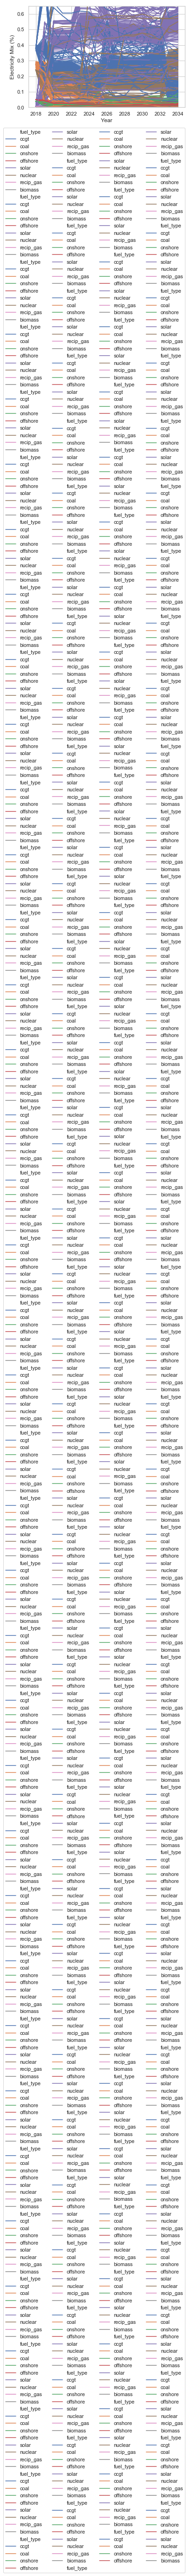

In [22]:
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for name, one_df in results_concat.groupby('params'):

    g=sns.lineplot(data=one_df, x='year', hue='fuel_type',  y='simulated_perc')
    g.set(xlabel='Year', ylabel='Electricity Mix (%)')
    # lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    lgd = plt.legend(bbox_to_anchor=(1,-0.2), borderaxespad=0., ncol=4)
    plt.ylim(0,0.65)

plt.show()

#     plt.close()